In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
from sklearn.decomposition import PCA

import utils
import plotter
from solver import SolverLinear, SolverRadialBasis

# from datafold.utils.plot import plot_pairwise_eigenvector
from utils import *
from plotter import *


DATA_PATH = os.getcwd() + "/data/"
FIGURE_PATH = os.getcwd() + "/figures/"

plt.rcParams['figure.dpi'] = 100
# plt.rcParams["figure.autolayout"] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import PCA
from function_approximation import *
from scipy.integrate import solve_ivp
from function_approximation import rbf

## Task 5
### Part 1: Create a reasonable state

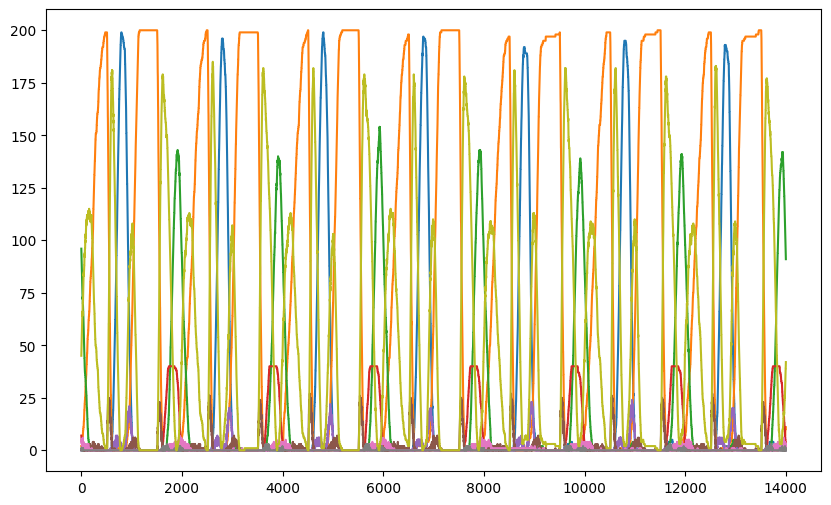

In [45]:
# load the dataset and visualize the 9 columns
df_loaded = pd.read_csv("data/MI_timesteps.txt", sep=" ", index_col=0)
plt.rcParams["figure.figsize"] = (10,6)
df = df_loaded.iloc[1000:]
df.index = df.index - 1000
for column in df.columns:
    plt.plot(df[column])
x_original = df.to_numpy()

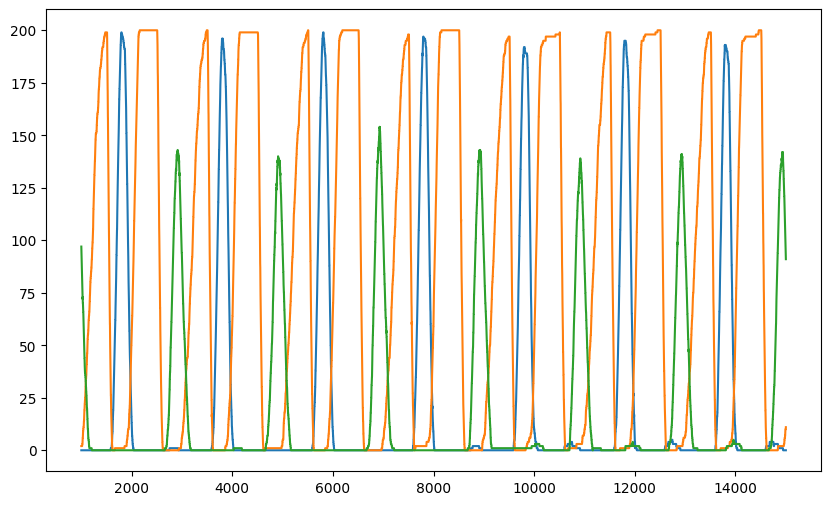

In [46]:
# U: utilizations
U = np.loadtxt(DATA_PATH + "MI_timesteps.txt") #delete the first string line
U = U[1000:,]

# consider 3 principal components 
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(U[:,0], U[:,1:4])

Create a reasonable state space of the given system using PCA

In [47]:
number_of_delays = 351  # time delay embedding with 350 delays
u_one_to_three = U[:,1:4]  # consider first three columns

window = []
for row in range(u_one_to_three.shape[0]-number_of_delays):
    window.append(u_one_to_three[row:row+number_of_delays].flatten())
window = np.array(window)
print(f'The window shape is {window.shape}')

The window shape is (13650, 1053)


## Part 2: Plot the embedded points
Plot the embedded points in PCA space for the 9 measurements based on different colors

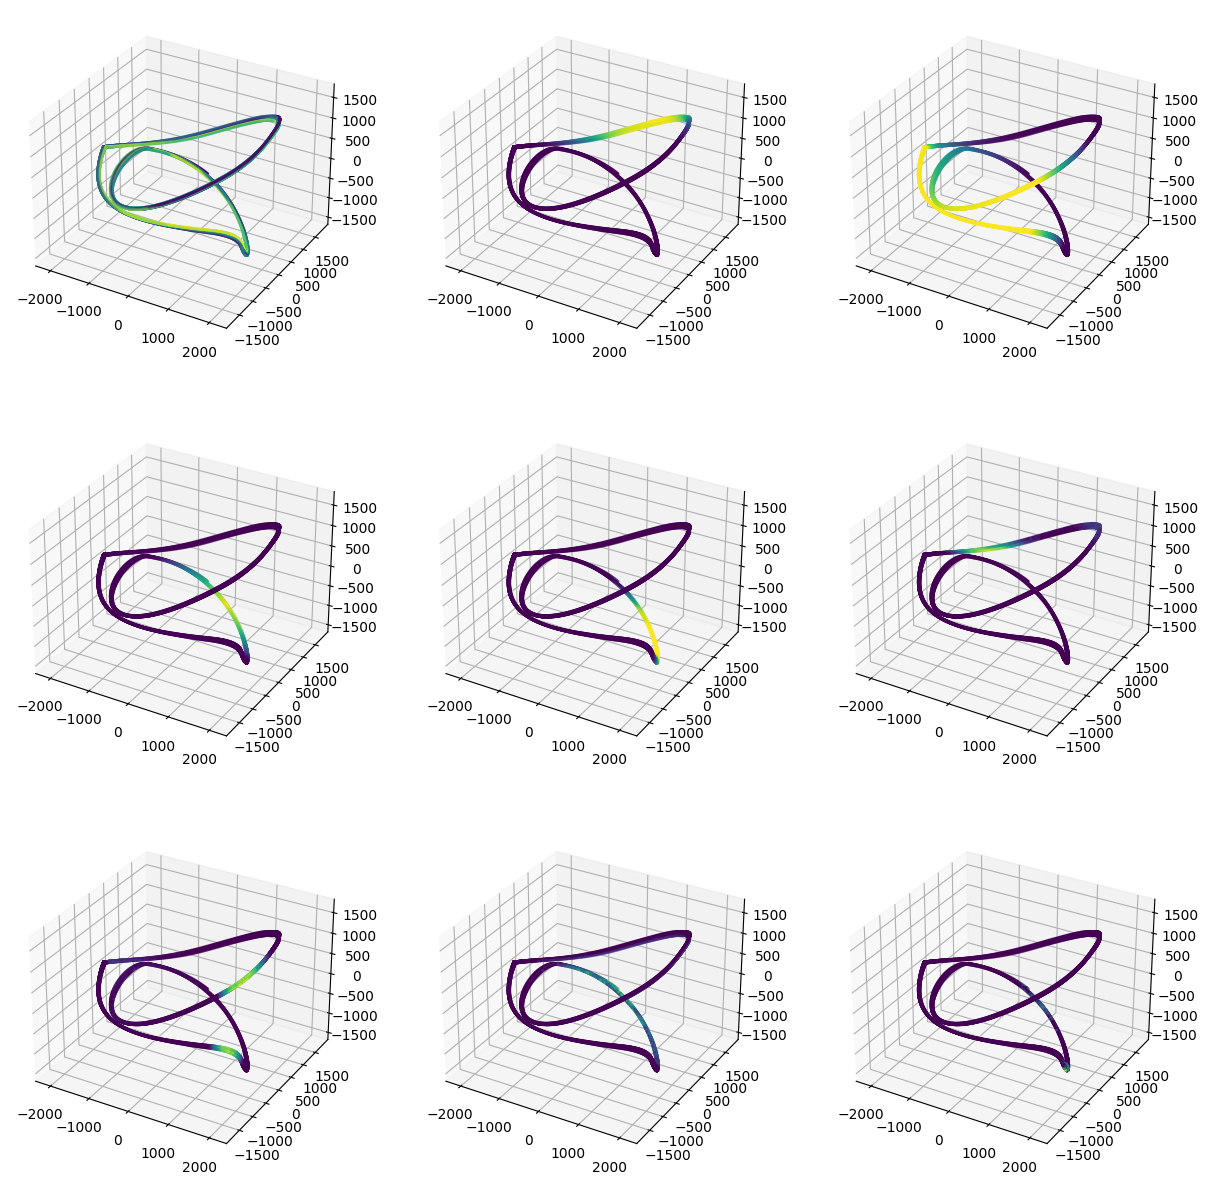

In [48]:
pca = PCA(n_components=3)
u_pca = pca.fit_transform(window)
plot_pca(u_pca, U, window.shape, 3, 3)